In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 716.3/716.3 kB 14.5 MB/s eta 0:00:00


In [ ]:
## importing required libraries
import os
import shutil
import random

!pip install tqdm --upgrade
from tqdm.notebook import tqdm

In [ ]:
train_path_img = "./content/drive/MyDrive/AA_Cricket_data/train/images/"
train_path_label = "./content/drive/MyDrive/AA_Cricket_data/train/labels/"
val_path_img = "./content/drive/MyDrive/AA_Cricket_data/valid/images/"
val_path_label = "./content/drive/MyDrive/AA_Cricket_data/valid/labels/"
test_path = "./content/drive/MyDrive/AA_Cricket_data/test/images/"

In [ ]:
'''
Split the dataset into train and test and creates the train.txt and test.tx with
the respective path of the images in each folder
'''

def train_test_split(path,neg_path=None, split = 0.2):
    print("------ PROCESS STARTED -------")


    files = list(set([name[:-4] for name in os.listdir(path)])) ## removing duplicate names i.e. counting only number of images


    print (f"--- This folder has a total number of {len(files)} images---")
    random.seed(42)
    random.shuffle(files)

    test_size = int(len(files) * split)
    train_size = len(files) - test_size

    ## creating required directories

    os.makedirs(train_path_img, exist_ok = True)
    os.makedirs(train_path_label, exist_ok = True)
    os.makedirs(val_path_img, exist_ok = True)
    os.makedirs(val_path_label, exist_ok = True)


    ### ----------- copying images to train folder
    for filex in tqdm(files[:train_size]):
      if filex == 'classes':
          continue
      shutil.copy2(path + filex + '.jpg',f"{train_path_img}/" + filex + '.jpg' )
      shutil.copy2(path + filex + '.txt', f"{train_path_label}/" + filex + '.txt')



    print(f"------ Training data created with 80% split {len(files[:train_size])} images -------")

    if neg_path:
        neg_images = list(set([name[:-4] for name in os.listdir(neg_path)])) ## removing duplicate names i.e. counting only number of images
        for filex in tqdm(neg_images):
            shutil.copy2(neg_path+filex+ ".jpg", f"{train_path_img}/" + filex + '.jpg')

        print(f"------ Total  {len(neg_images)} negative images added to the training data -------")

        print(f"------ TOTAL Training data created with {len(files[:train_size]) + len(neg_images)} images -------")



    ### copytin images to validation folder
    for filex in tqdm(files[train_size:]):
      if filex == 'classes':
          continue
      # print("running")
      shutil.copy2(path + filex + '.jpg', f"{val_path_img}/" + filex + '.jpg' )
      shutil.copy2(path + filex + '.txt', f"{val_path_label}/" + filex + '.txt')

    print(f"------ Testing data created with a total of {len(files[train_size:])} images ----------")

    print("------ TASK COMPLETED -------")


In [ ]:
!yolo task=detect mode=train model=yolov8s.pt data=/content/drive/MyDrive/AA_Cricket_data/dataset.yaml epochs=10 imgsz=640 batch=8 project=/content/drive/MyDrive/AA_Cricket_data/training_results name=bat


Ultralytics YOLOv8.1.20 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/drive/MyDrive/AA_Cricket_data/dataset.yaml, epochs=10, time=None, patience=100, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=/content/drive/MyDrive/AA_Cricket_data/training_results, name=bat, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, 

In [3]:
# Import libraries
from ultralytics import YOLO

# Define model path (modify as needed)
model_path = "/content/drive/MyDrive/AA_Cricket_data/training_results/bat/weights/last.pt"

# Load the model
model = YOLO(model_path)

# Define image path (modify as needed)
image_path = "/content/cricket.jpg"

# Perform detection
results = model(image_path)



image 1/1 /content/cricket.jpg: 448x640 2 cricket_bats, 612.0ms
Speed: 19.8ms preprocess, 612.0ms inference, 32.1ms postprocess per image at shape (1, 3, 448, 640)


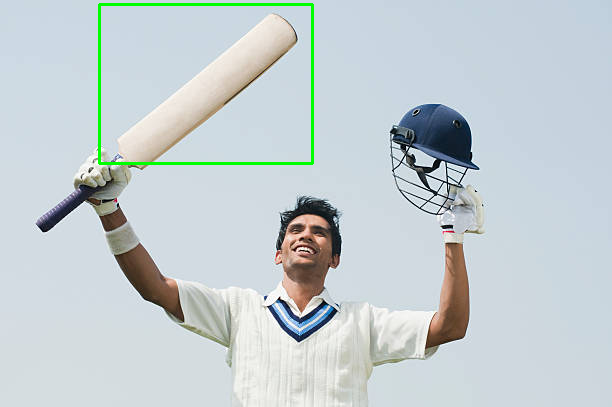

In [4]:
import cv2
from google.colab.patches import cv2_imshow
# Load the image
image = cv2.imread(image_path)

# Iterate over each set of detection results in the list
for result in results:
    # Extract bounding box information from the 'boxes' attribute
    boxes = result.boxes[0]

    # Iterate over the bounding boxes
    for box in boxes:
        # Extract bounding box coordinates
        x1, y1, x2, y2 = box.xyxy[0]

        # Draw bounding box on the image
        cv2.rectangle(image, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 2)

# Display the image with bounding boxes
cv2_imshow(image)
